In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

# Exploratory Analysis of Data

We will start with simply looking onto the data, its type and number of different types variables

In [2]:
### Upload Unprepared Combined Dataset 
df = pd.read_csv("/full_data_with_nans.csv")
df.shape

(5874, 376)

In [3]:
df.describe()

,ID,RID,SITEID,PTSOURCE,PTGENDER,PTDOBMM,PTDOBYY,PTHAND,PTMARRY,PTEDUCAT,PTWORKHS,PTNOTRT,PTHOME,PTTLANG,PTPLANG,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,LONIUID,IMAGEUID,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,ST104SA,ST104TA,ST104TS,ST105CV,ST105SA,ST105TA,ST105TS,...,ST91CV,ST91SA,ST91TA,ST91TS,ST93CV,ST93SA,ST93TA,ST93TS,ST94CV,ST94SA,ST94TA,ST94TS,ST95CV,ST95SA,ST95TA,ST95TS,ST96SV,ST97CV,ST97SA,ST97TA,ST97TS,ST98CV,ST98SA,ST98TA,ST98TS,ST99CV,ST99SA,ST99TA,ST99TS,ST9SV,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,Y
count,5874.000000,5874.000000,5874.000000,5874.000000,5734.000000,5734.000000,5734.000000,5731.000000,5874.000000,5734.000000,853.000000,5873.000000,5874.000000,5734.000000,5734.000000,5024.000000,632.000000,13.000000,5018.000000,5734.000000,5734.000000,5785.000000,5.874000e+03,5872.000000,5857.000000,5857.000000,5857.000000,5857.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,...,5846.000000,5846.000000,5846.000000,5846.000000,5872.000000,5872.000000,5872.000000,5872.000000,5814.000000,5814.000000,5814.000000,5814.000000,5872.000000,5872.00000,5872.000000,5872.000000,5870.000000,5814.000000,5814.000000,5814.000000,5814.000000,5867.000000,5867.000000,5867.000000,5867.000000,5846.000000,5846.000000,5846.000000,5846.000000,5870.000000,5860.000000,5860.000000,5860.000000,5858.000000,5858.000000,5858.000000,5860.000000,5860.000000,5.860000e+03,5610.000000
mean,8080.300477,4247.738849,30.304222,1.010215,1.475061,6.569062,1940.073596,1.101378,1.455907,16.283746,0.933177,0.808786,1.522131,1.008546,1.036624,4855.073846,2007.072785,770.076923,8973.820247,1.967562,4.923788,261609.472602,4.709909e+05,1480.370640,3519.301690,1449.262421,2.264205,0.594747,1926.475647,629.486887,2.644022,0.784032,3508.037296,1300.950954,2.437556,0.523305,2327.247786,725.169448,2.557654,0.678450,...,9678.908313,2976.585015,2.742114,0.761124,2249.237568,881.252725,2.368589,0.802379,10718.970244,4465.863777,2.158423,0.621062,6640.401226,2455.09639,2.502724,0.772672,17538.617615,6185.044204,2960.783970,1.936060,0.616122,4683.577638,1765.992500,2.333645,0.774925,10572.936196,3158.338351,2.764359,0.679106,2107.650767,206393.177251,207389.489719,413782.669871,225204.672004,226216.742025,451421.403103,150306.138567,579162.530963,9.825203e+05,1.789305
std,19253.928694,1430.669436,17.459853,0.100558,0.499421,3.435284,7.818218,0.301856,0.865468,2.606843,0.500224,0.446807,1.228501,0.092054,0.245777,3827.318623,3.190877,1019.119674,2672.020583,0.201151,0.502860,225942.364690,2.935920e+05,245.223205,556.303725,203.024741,0.175193,0.068000,339.840659,94.326917,0.323139,0.122170,598.354227,213.677967,0.163110,0.079095,354.779575,100.668233,0.220792,0.097936,...,1677.113238,426.946426,0.218098,0.086059,406.138407,153.322050,0.239269,0.089990,1692.367390,576.281981,0.172094,0.065323,785.019710,305.18021,0.180354,0.083954,9788.163485,974.349804,389.346835,0.148097,0.062013,628.868429,213.959583,0.193219,0.107186,1617.457620,408.575998,0.205217,0.088746,651.198707,22337.666298,22473.358106,44463.471382,29844.026368,30067.815724,59691.581329,42997.050312,55719.910500,1.058351e+05,0.633773
min,12.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1916.000000,1.000000,1.000000,6.000000,-4.000000,0.000000,1.000000,1.000000,1.000000,1985.000000,1985.000000,-4.000000,1987.000000,1.000000,1.000000,79478.000000,2.219590e+05,506.000000,1849.000000,978.000000,1.480000,0.362000,699.000000,218.000000,1.489000,0.417000,1316.000000,626.000000,1.700000,0.298000,492.000000,136.000000,1.641000,0.383000,...,3354.000000,1509.000000,1.523000,0.473000,261.000000,97.000000,1.327000,0.471000,4990.000000,2065.000000,1.277000,0.349000,3203.000000,1236.00000,1.868000,0.507000,2003.000000,3232.000000,1429.000000,1.479000,0.376000,2178.000000,795.000000,1.612000,0.482000,3999.000000,1442.000000,1.663000,0.431

In [4]:
df.dtypes

Phase              object
ID                  int64
RID                 int64
SITEID              int64
VISCODE_x          object
                   ...   
ST153SV           float64
ST154SV           float64
ST155SV           float64
update_stamp_y     object
Y                 float64
Length: 376, dtype: object

In [5]:
df.dtypes.value_counts()

float64    344
object      27
int64        5
dtype: int64

## Object variables

In [6]:
object_cols = list(df.columns[np.where(df.dtypes == 'object')[0]])
print(len(object_cols))
object_cols

27


['Phase',
 'VISCODE_x',
 'VISCODE2_x',
 'USERDATE',
 'USERDATE2',
 'PTWORK',
 'PTWRECNT',
 'PTRTYR',
 'PTOTHOME',
 'PTPSPEC',
 'update_stamp_x',
 'VISCODE_y',
 'VISCODE2_y',
 'EXAMDATE',
 'VERSION',
 'RUNDATE',
 'STATUS',
 'OVERALLQC',
 'TEMPQC',
 'FRONTQC',
 'PARQC',
 'INSULAQC',
 'OCCQC',
 'BGQC',
 'CWMQC',
 'VENTQC',
 'update_stamp_y']

## Float variables

In [7]:
float_cols = list(df.columns[np.where(df.dtypes == 'float')[0]])
print(len(float_cols))
float_cols

344


['PTGENDER',
 'PTDOBMM',
 'PTDOBYY',
 'PTHAND',
 'PTMARRY',
 'PTEDUCAT',
 'PTWORKHS',
 'PTNOTRT',
 'PTHOME',
 'PTTLANG',
 'PTPLANG',
 'PTCOGBEG',
 'PTMCIBEG',
 'PTADBEG',
 'PTADDX',
 'PTETHCAT',
 'PTRACCAT',
 'LONIUID',
 'ST101SV',
 'ST102CV',
 'ST102SA',
 'ST102TA',
 'ST102TS',
 'ST103CV',
 'ST103SA',
 'ST103TA',
 'ST103TS',
 'ST104CV',
 'ST104SA',
 'ST104TA',
 'ST104TS',
 'ST105CV',
 'ST105SA',
 'ST105TA',
 'ST105TS',
 'ST106CV',
 'ST106SA',
 'ST106TA',
 'ST106TS',
 'ST107CV',
 'ST107SA',
 'ST107TA',
 'ST107TS',
 'ST108CV',
 'ST108SA',
 'ST108TA',
 'ST108TS',
 'ST109CV',
 'ST109SA',
 'ST109TA',
 'ST109TS',
 'ST10CV',
 'ST110CV',
 'ST110SA',
 'ST110TA',
 'ST110TS',
 'ST111CV',
 'ST111SA',
 'ST111TA',
 'ST111TS',
 'ST112SV',
 'ST113CV',
 'ST113SA',
 'ST113TA',
 'ST113TS',
 'ST114CV',
 'ST114SA',
 'ST114TA',
 'ST114TS',
 'ST115CV',
 'ST115SA',
 'ST115TA',
 'ST115TS',
 'ST116CV',
 'ST116SA',
 'ST116TA',
 'ST116TS',
 'ST117CV',
 'ST117SA',
 'ST117TA',
 'ST117TS',
 'ST118CV',
 'ST118SA',
 

## Int variables

In [11]:
int_cols = list(df.columns[np.where(df.dtypes == 'int64')[0]])
print(len(int_cols))
int_cols

5


['ID', 'RID', 'SITEID', 'PTSOURCE', 'IMAGEUID']

## Distribution of target

In [12]:
df['Y'].value_counts()

2.0    3108
1.0    1842
3.0     660
Name: Y, dtype: int64

### Let's start from float data. Looks like all columns that start from PT are for Patient. ST\* columns are for features. Let's take only ST\* columns

In [13]:
all_st_cols = [s for s in df.columns if ('ST' in s) and ('STATUS' != s)]

len(all_st_cols)

325

In [14]:
numerical_data = df[all_st_cols]

numerical_data.shape

(5874, 325)

In [15]:
list(numerical_data.columns)

['ST101SV',
 'ST102CV',
 'ST102SA',
 'ST102TA',
 'ST102TS',
 'ST103CV',
 'ST103SA',
 'ST103TA',
 'ST103TS',
 'ST104CV',
 'ST104SA',
 'ST104TA',
 'ST104TS',
 'ST105CV',
 'ST105SA',
 'ST105TA',
 'ST105TS',
 'ST106CV',
 'ST106SA',
 'ST106TA',
 'ST106TS',
 'ST107CV',
 'ST107SA',
 'ST107TA',
 'ST107TS',
 'ST108CV',
 'ST108SA',
 'ST108TA',
 'ST108TS',
 'ST109CV',
 'ST109SA',
 'ST109TA',
 'ST109TS',
 'ST10CV',
 'ST110CV',
 'ST110SA',
 'ST110TA',
 'ST110TS',
 'ST111CV',
 'ST111SA',
 'ST111TA',
 'ST111TS',
 'ST112SV',
 'ST113CV',
 'ST113SA',
 'ST113TA',
 'ST113TS',
 'ST114CV',
 'ST114SA',
 'ST114TA',
 'ST114TS',
 'ST115CV',
 'ST115SA',
 'ST115TA',
 'ST115TS',
 'ST116CV',
 'ST116SA',
 'ST116TA',
 'ST116TS',
 'ST117CV',
 'ST117SA',
 'ST117TA',
 'ST117TS',
 'ST118CV',
 'ST118SA',
 'ST118TA',
 'ST118TS',
 'ST119CV',
 'ST119SA',
 'ST119TA',
 'ST119TS',
 'ST11SV',
 'ST120SV',
 'ST121CV',
 'ST121SA',
 'ST121TA',
 'ST121TS',
 'ST124SV',
 'ST125SV',
 'ST127SV',
 'ST128SV',
 'ST129CV',
 'ST129SA',
 'ST12

In [16]:
numerical_data.shape[0]*numerical_data.shape[1]

1909050

In [17]:
before = numerical_data.describe().values

In [18]:
numerical_data = numerical_data.fillna(numerical_data.mean(axis=0))

In [19]:
after = numerical_data.describe().values

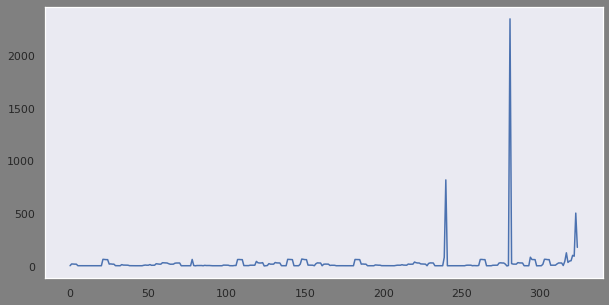

In [20]:
plt.figure(figsize=(10,5))
plt.plot(abs(np.sum(before-after,axis=0)))
plt.grid()

In [21]:
numerical_data

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,ST104SA,ST104TA,ST104TS,ST105CV,ST105SA,ST105TA,ST105TS,ST106CV,ST106SA,ST106TA,ST106TS,ST107CV,ST107SA,ST107TA,ST107TS,ST108CV,ST108SA,ST108TA,ST108TS,ST109CV,ST109SA,ST109TA,ST109TS,ST10CV,ST110CV,ST110SA,ST110TA,ST110TS,ST111CV,ST111SA,...,ST90TS,ST91CV,ST91SA,ST91TA,ST91TS,ST93CV,ST93SA,ST93TA,ST93TS,ST94CV,ST94SA,ST94TA,ST94TS,ST95CV,ST95SA,ST95TA,ST95TS,ST96SV,ST97CV,ST97SA,ST97TA,ST97TS,ST98CV,ST98SA,ST98TA,ST98TS,ST99CV,ST99SA,ST99TA,ST99TS,ST9SV,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV
0,1796.0,3946.0,1578.0,2.358,0.648,2807.0,744.0,3.057,0.792,3730.0,1247.0,2.678,0.610,2693.0,830.0,2.708,0.632,4696.0,1722.0,2.384,0.579,1673.0,1155.0,1.528,0.498,8282.0,3780.0,1.952,0.630,3465.0,1206.0,2.579,0.723,1468290.000,11575.0,4344.0,2.463,0.577,10940.0,4455.0,...,0.561,10565.0,3053.0,2.901,0.744,2478.0,982.0,2.355,1.032,10362.0,3862.0,2.346,0.553,6641.0,2409.0,2.546,0.796,6071.0,6351.0,2648.0,2.136,0.626,5672.0,2162.0,2.354,0.716,13153.0,3750.0,2.845,0.710,1246.0,227898.0000,231372.0000,459270.0000,221181.0000,224841.0000,446022.0000,174012.0,633282.0000,9.989370e+05
1,1751.0,3927.0,1579.0,2.331,0.660,2820.0,772.0,3.055,0.809,3564.0,1260.0,2.524,0.635,2470.0,779.0,2.597,0.715,4456.0,1674.0,2.269,0.586,1657.0,1116.0,1.522,0.482,8020.0,3800.0,1.934,0.579,3384.0,1232.0,2.454,0.746,1466430.000,11316.0,4559.0,2.347,0.599,10804.0,4434.0,...,0.598,10118.0,3068.0,2.778,0.756,2470.0,1063.0,2.192,0.962,9797.0,3991.0,2.191,0.539,7159.0,2776.0,2.434,0.780,6281.0,6179.0,2597.0,2.182,0.643,5411.0,2199.0,2.217,0.671,12555.0,3729.0,2.712,0.716,1217.0,223158.0000,224229.0000,447387.0000,229883.0000,227633.0000,457516.0000,173016.0,620403.0000,9.954770e+05
2,1373.0,3200.0,1375.0,2.158,0.683,1968.0,687.0,2.350,0.786,3108.0,1173.0,2.365,0.500,2199.0,703.0,2.372,0.609,3680.0,1477.0,2.177,0.522,2256.0,1525.0,1.566,0.425,10870.0,3862.0,2.225,0.903,2472.0,1048.0,2.143,0.724,1665490.000,12524.0,4977.0,2.253,0.702,9370.0,3605.0,...,0.601,10224.0,3286.0,2.549,0.761,1997.0,855.0,2.025,0.784,10763.0,4571.0,2.113,0.631,6456.0,2234.0,2.465,0.686,46299.0,5901.0,2891.0,1.824,0.610,5024.0,1900.0,2.230,0.810,12956.0,3596.0,2.828,0.777,2891.0,222306.0000,223673.0000,445979.0000,214800.0000,215904.0000,430704.0000,171871.0,617850.0000,1.073660e+06
3,1200.0,3226.0,1368.0,2.179,0.583,1914.0,708.0,2.275,0.730,2998.0,1182.0,2.265,0.565,1776.0,712.0,2.002,0.627,3610.0,1429.0,2.222,0.585,2129.0,1557.0,1.450,0.388,9771.0,4056.0,2.018,0.865,2144.0,997.0,1.923,0.688,1660400.000,11766.0,5239.0,2.080,0.672,9171.0,3540.0,...,0.563,10282.0,3178.0,2.620,0.805,1949.0,924.0,1.917,0.661,11568.0,4914.0,2.092,0.626,6772.0,2503.0,2.342,0.724,24760.0,5893.0,2943.0,1.819,0.596,5218.0,2058.0,2.133,0.917,12669.0,3719.0,2.755,0.747,3002.0,222171.0000,220781.0000,442952.0000,215978.0000,217603.0000,433581.0000,167879.0,610831.0000,1.010870e+06
4,1435.0,2740.0,1153.0,2.298,0.609,1759.0,539.0,2.617,0.951,3870.0,1330.0,2.656,0.522,2345.0,719.0,2.567,0.670,3403.0,1231.0,2.409,0.565,2368.0,1511.0,1.605,0.442,8303.0,3610.0,2.077,0.681,3223.0,1078.0,2.748,0.747,1471760.000,11390.0,4228.0,2.521,0.550,9398.0,3816.0,...,0.580,7425.0,1976.0,2.987,0.846,2210.0,860.0,2.417,0.895,10577.0,4504.0,2.122,0.527,6601.0,2432.0,2.462,0.880,10841.0,7031.0,2926.0,2.113,0.630,4361.0,1414.0,2.573,0.982,10761.0,3108.0,2.754,0.638,1407.0,201718.0000,197309.0000,399027.0000,197731.0000,192553.0000,390284.0000,153531.0,552558.0000,9.090550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1470.6,3244.0,1278.0,2.336,0.618,1713.0,491.0,3.138,0.856,2957.0,1116.0,2.464,0.445,2389.0,690.0,3.056,0.667,2872.0,1135.0,2.357,0.555,1228.0

## So, this is our data

In [22]:
data = numerical_data
target = df[['Y']]

## Think it should be normalized

In [23]:
data.describe()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,ST104SA,ST104TA,ST104TS,ST105CV,ST105SA,ST105TA,ST105TS,ST106CV,ST106SA,ST106TA,ST106TS,ST107CV,ST107SA,ST107TA,ST107TS,ST108CV,ST108SA,ST108TA,ST108TS,ST109CV,ST109SA,ST109TA,ST109TS,ST10CV,ST110CV,ST110SA,ST110TA,ST110TS,ST111CV,ST111SA,...,ST90TS,ST91CV,ST91SA,ST91TA,ST91TS,ST93CV,ST93SA,ST93TA,ST93TS,ST94CV,ST94SA,ST94TA,ST94TS,ST95CV,ST95SA,ST95TA,ST95TS,ST96SV,ST97CV,ST97SA,ST97TA,ST97TS,ST98CV,ST98SA,ST98TA,ST98TS,ST99CV,ST99SA,ST99TA,ST99TS,ST9SV,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,...,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5.874000e+03
mean,1480.370640,3519.301690,1449.262421,2.264205,0.594747,1926.475647,629.486887,2.644022,0.784032,3508.037296,1300.950954,2.437556,0.523305,2327.247786,725.169448,2.557654,0.678450,3604.050068,1373.418767,2.303507,0.575397,2102.530272,1438.445820,1.533707,0.428771,8146.163053,3890.984634,1.895386,0.631508,2910.040191,1095.365463,2.442126,0.702002,1.501757e+06,11856.493779,4744.843020,2.328271,0.617113,8827.771117,3647.235865,...,0.604400,9678.908313,2976.585015,2.742114,0.761124,2249.237568,881.252725,2.368589,0.802379,10718.970244,4465.863777,2.158423,0.621062,6640.401226,2455.096390,2.502724,0.772672,17538.617615,6185.044204,2960.783970,1.936060,0.616122,4683.577638,1765.992500,2.333645,0.774925,10572.936196,3158.338351,2.764359,0.679106,2107.650767,206393.177251,207389.489719,413782.669871,225204.672004,226216.742025,451421.403103,150306.138567,579162.530963,9.825203e+05
std,245.181447,555.498002,202.730690,0.174939,0.067902,339.782789,94.310854,0.323084,0.122149,598.252336,213.641581,0.163082,0.079081,354.719161,100.651090,0.220754,0.097919,623.711208,223.091530,0.157951,0.082400,399.816837,231.878934,0.140611,0.075057,1225.104794,477.198167,0.149212,0.064098,487.659556,192.512418,0.192634,0.103438,1.603598e+05,1560.997161,563.654754,0.180719,0.061373,1242.367160,470.017548,...,0.076501,1673.110575,425.927459,0.217578,0.085854,406.069248,153.295941,0.239228,0.089975,1683.700379,573.330705,0.171213,0.064989,784.886032,305.128242,0.180323,0.083939,9784.829642,969.359929,387.352898,0.147338,0.061696,628.493544,213.832037,0.193104,0.107122,1613.597334,407.600875,0.204727,0.088534,650.976909,22311.026257,22446.556238,44410.443967,29803.346129,30026.830439,59610.216041,42945.771761,55653.458585,1.057088e+05
min,506.000000,1849.000000,978.000000,1.480000,0.362000,699.000000,218.000000,1.489000,0.417000,1316.000000,626.000000,1.700000,0.298000,492.000000,136.000000,1.641000,0.383000,1150.000000,482.000000,1.672000,0.321000,823.000000,594.000000,1.145000,0.216000,2792.000000,1590.000000,1.328000,0.406000,644.000000,238.000000,1.020000,0.405000,6.554488e+05,4429.000000,2324.000000,1.430000,0.407000,4266.000000,2077.000000,...,0.342000,3354.000000,1509.000000,1.523000,0.473000,261.000000,97.000000,1.327000,0.471000,4990.000000,2065.000000,1.277000,0.349000,3203.000000,1236.000000,1.868000,0.507000,2003.000000,3232.000000,1429.000000,1.479000,0.376000,2178.000000,795.000000,1.612

In [24]:
def normalize(arr):
    out = (arr - arr.mean(axis=0)[None,:])/arr.var(axis=0)
    return out

In [25]:
data = normalize(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [26]:
data.describe()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,ST104SA,ST104TA,ST104TS,ST105CV,ST105SA,ST105TA,ST105TS,ST106CV,ST106SA,ST106TA,ST106TS,ST107CV,ST107SA,ST107TA,ST107TS,ST108CV,ST108SA,ST108TA,ST108TS,ST109CV,ST109SA,ST109TA,ST109TS,ST10CV,ST110CV,ST110SA,ST110TA,ST110TS,ST111CV,ST111SA,...,ST90TS,ST91CV,ST91SA,ST91TA,ST91TS,ST93CV,ST93SA,ST93TA,ST93TS,ST94CV,ST94SA,ST94TA,ST94TS,ST95CV,ST95SA,ST95TA,ST95TS,ST96SV,ST97CV,ST97SA,ST97TA,ST97TS,ST98CV,ST98SA,ST98TA,ST98TS,ST99CV,ST99SA,ST99TA,ST99TS,ST9SV,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV
count,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,...,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03,5.874000e+03
mean,4.131412e-18,9.693347e-18,2.796784e-17,-1.385497e-13,-5.900414e-14,1.371292e-18,6.783333e-18,-1.025360e-13,1.986744e-14,1.058066e-18,2.836497e-18,3.393547e-13,-2.776603e-13,3.989067e-18,-1.938201e-18,-1.439982e-13,1.142753e-13,-1.070654e-18,-4.280697e-18,2.166954e-13,-4.534712e-13,2.751201e-17,6.080377e-17,1.417470e-13,3.076962e-14,-5.438915e-18,2.239543e-17,3.206826e-13,1.234002e-13,3.223905e-18,2.789320e-19,-1.210209e-13,8.772312e-14,1.270678e-19,-1.158485e-18,-5.010513e-19,-3.058439e-13,2.688982e-13,8.243185e-20,-6.325436e-19,...,-3.173104e-13,-3.709239e-18,3.515443e-19,-1.047571e-13,-4.028273e-13,3.981684e-19,2.358149e-19,-6.151868e-14,1.804454e-13,6.577807e-18,-2.012253e-18,1.949877e-13,-9.627527e-14,-7.874032e-20,2.806485e-19,2.408069e-13,6.772655e-14,-1.646099e-19,-1.049389e-18,3.439173e-17,-1.017549e-13,-5.234331e-13,-2.994144e-18,-1.369705e-18,-3.312162e-14,2.642671e-13,5.325954e-18,2.960075e-17,1.076668e-13,-2.461287e-13,-1.876534e-17,-2.964333e-19,4.302795e-19,2.012509e-19,3.151210e-19,1.920980e-20,1.007892e-19,9.692572e-21,2.467470e-19,-4.500847e-20
std,4.078612e-03,1.800186e-03,4.932652e-03,5.716280e+00,1.472718e+01,2.943057e-03,1.060323e-02,3.095169e+00,8.186723e+00,1.671535e-03,4.680737e-03,6.131876e+00,1.264519e+01,2.819132e-03,9.935312e-03,4.529930e+00,1.021252e+01,1.603306e-03,4.482465e-03,6.331083e+00,1.213591e+01,2.501145e-03,4.312595e-03,7.111803e+00,1.332314e+01,8.162567e-04,2.095565e-03,6.701852e+00,1.560106e+01,2.050611e-03,5.194470e-03,5.191192e+00,9.667645e+00,6.235977e-06,6.406162e-04,1.774136e-03,5.533449e+00,1.629387e+01,8.049150e-04,2.127580e-03,...,1.307172e+01,5.976891e-04,2.347818e-03,4.596060e+00,1.164769e+01,2.462634e-03,6.523330e-03,4.180115e+00,1.111425e+01,5.939299e-04,1.744194e-03,5.840684e+00,1.538733e+01,1.274070e-03,3.277311e-03,5.545596e+00,1.191336e+01,1.021990e-04,1.031609e-03,2.581625e-03,6.787094e+00,1.620859e+01,1.591106e-03,4.676568e-03,5.178549e+00,9.335159e+00,6.197333e-04,2.453380e-03,4.884548e+00,1.129509e+01,1.536153e-03,4.482089e-05,4.455026e-05,2.251723e-05,3.355328e-05,3.330355e-05,1.677565e-05,2.328518e-05,1.796834e-05,9.459947e-06
min,-1.620873e-02,-5.412899e-03,-1.146631e-02,-2.562456e+01,-5.048053e+01,-1.063188e-02,-4.626288e-02,-1.106519e+01,-2.459940e+01,-6.124620e-03,-1.478770e-02,-2.773202e+01,-3.602642e+01,-1.458564e-02,-5.8157

## We can try to plot some scatter plots and check whats going on

In [27]:
from tqdm import tqdm
tmp = pd.concat([data,target],axis=1)
cols = tmp.columns
N = len(cols)

for i in tqdm(range(50,60)):
    for j in range(i+1, 60):
        plt.figure(figsize=(10,10))
        sns.scatterplot(data=tmp, x=cols[i], y=cols[j], hue="Y", palette=['green','yellow','red'])
        plt.title(cols[i] + " v.s. " + cols[j])
#         plt.axis('equal')
        plt.grid()
        plt.savefig('scatter_plot_{}_{}.png'.format(cols[i],cols[j]))
        plt.close('all')

100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


# sklearn.decomposition PCA ()

In [28]:
U, sigma, V = np.linalg.svd(data)

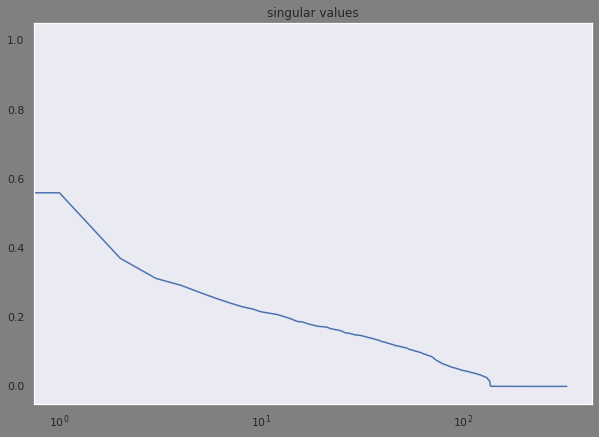

In [29]:
plt.figure(figsize=(10,7))
plt.title('singular values')
plt.semilogx(sigma/sigma[0])
plt.grid()

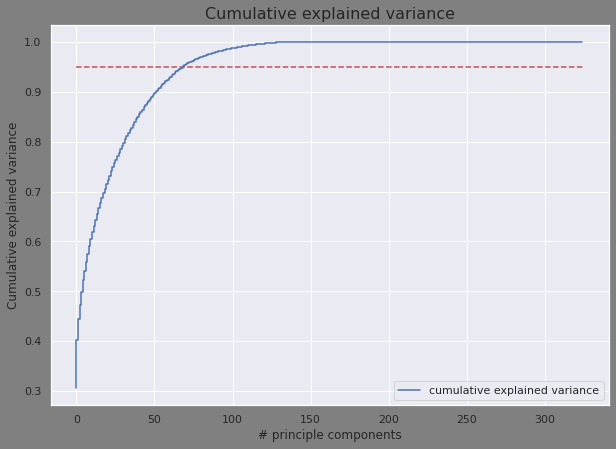

In [30]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)

plt.figure(figsize=(10,7))
plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.legend(loc='lower right')
plt.hlines(y=0.95, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.show()

## intrinsic dimension

In [31]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in tqdm(range(k1, k2 + 1)): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

100%|██████████| 16/16 [02:46<00:00, 10.43s/it]


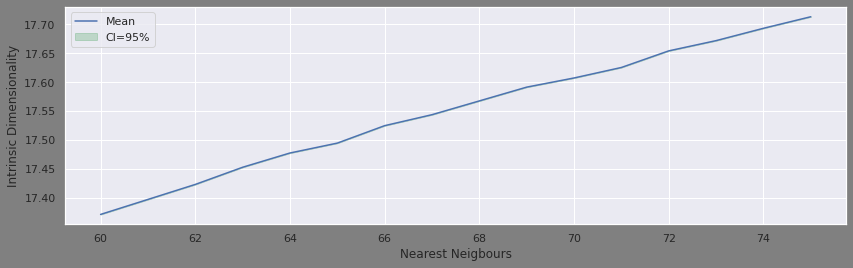

In [32]:
import warnings
warnings.filterwarnings("ignore")

k1 = 60 # start of interval(included)
k2 = 75 # end of interval(included)
nb_iter = 1 # more iterations more accuracy
# intrinsic_dim_scale_interval gives better estimation
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data.values, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

In [33]:
np.sum(intdim_k_repeated.mean(axis=0))/(k2-k1+1)

17.55060552028411